<a href="https://colab.research.google.com/github/zohaibkhanzohaibi/OEC_Japan_IT_Class/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Operations with 1D and 2D NumPy Arrays**

In [58]:
import numpy as np

In [59]:
arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [60]:
def numpy_op():
  global arr_1d, arr_2d
  print("1D Array: ", arr_1d)
  print("2D Array:\n ", arr_2d)
  print("Sum of 1D Array: ", np.sum(arr_1d))
  print("Mean of 2D Array: ", np.mean(arr_2d))
  print("Transpose of 2D Array:\n ", arr_2d.T)

In [61]:
numpy_op()

1D Array:  [1 2 3 4 5]
2D Array:
  [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array:  15
Mean of 2D Array:  5.0
Transpose of 2D Array:
  [[1 4 7]
 [2 5 8]
 [3 6 9]]


**Image Processing With NumPy (Indexing & Slicing in Action)**

In [62]:
def image_slicing():
  image =  np.random.randint(0,256,(5,5), dtype=np.uint8)
  print("Orignal image: \n",image)

  cropped = image[1:4, 1:4]
  print("Cropped Section:\n", cropped)

  inverted_image = 255 - image
  print("Inverted Image:\n", inverted_image)

image_slicing()

Orignal image: 
 [[ 60 116 217 188 102]
 [ 22 123  61 146 149]
 [224 129 175  36 215]
 [ 15 223   9 202 226]
 [ 87 253 121 222  32]]
Cropped Section:
 [[123  61 146]
 [129 175  36]
 [223   9 202]]
Inverted Image:
 [[195 139  38  67 153]
 [233 132 194 109 106]
 [ 31 126  80 219  40]
 [240  32 246  53  29]
 [168   2 134  33 223]]


**Augmented Reality Transformation**


In [63]:
import cv2

In [64]:
img = cv2.imread('/content/gojo.jpg')

In [65]:
def scale_image(img, scale_factor):
  scaling_matrix = np.array([[scale_factor, 0, 0],
                             [0, scale_factor, 0],
                             [0, 0, 1]])
  rows, cols = img.shape[:2] #3rd color channel usually

  scaled_image = cv2.warpPerspective(img, scaling_matrix, (cols, rows))
  return scaled_image

In [66]:
def rotate_image(img, angle):
  rows, cols = img.shape[:2]
  rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
  rotated_image = cv2.warpAffine(img, rotation_matrix, (cols, rows))
  return rotated_image

In [67]:
def translate_image(img, tx, ty):
  translation_matrix = np.array([[1, 0, tx],
                                 [0, 1, ty],
                                 [0, 0, 1]], dtype = np.float32)
  rows, cols = img.shape[:2]

  translated_img = cv2.warpPerspective(img, translation_matrix, (cols, rows))
  return translated_img

In [68]:
scaled_image = scale_image(img, 1.5)
rotated_image = rotate_image(img, 45)
translated_image = translate_image(img, 50, 30)

Original Image


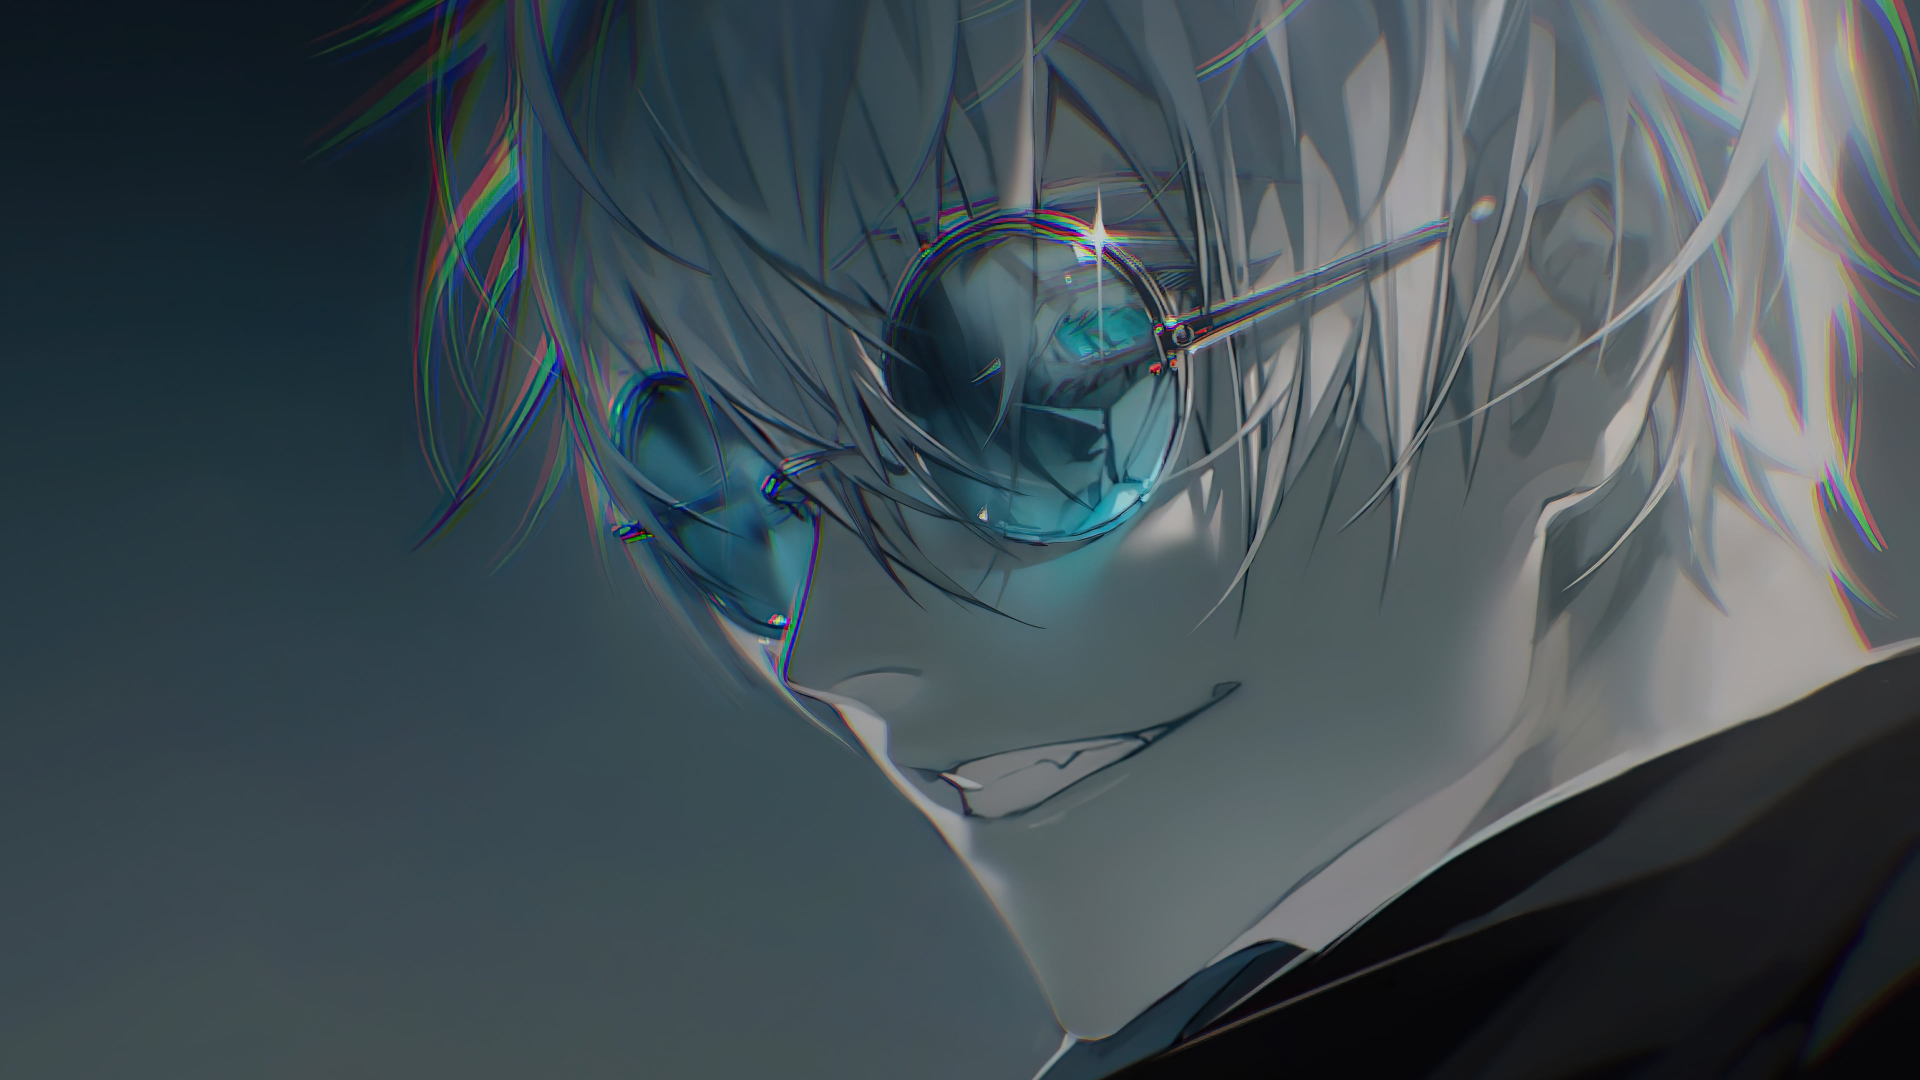

Scaled Image


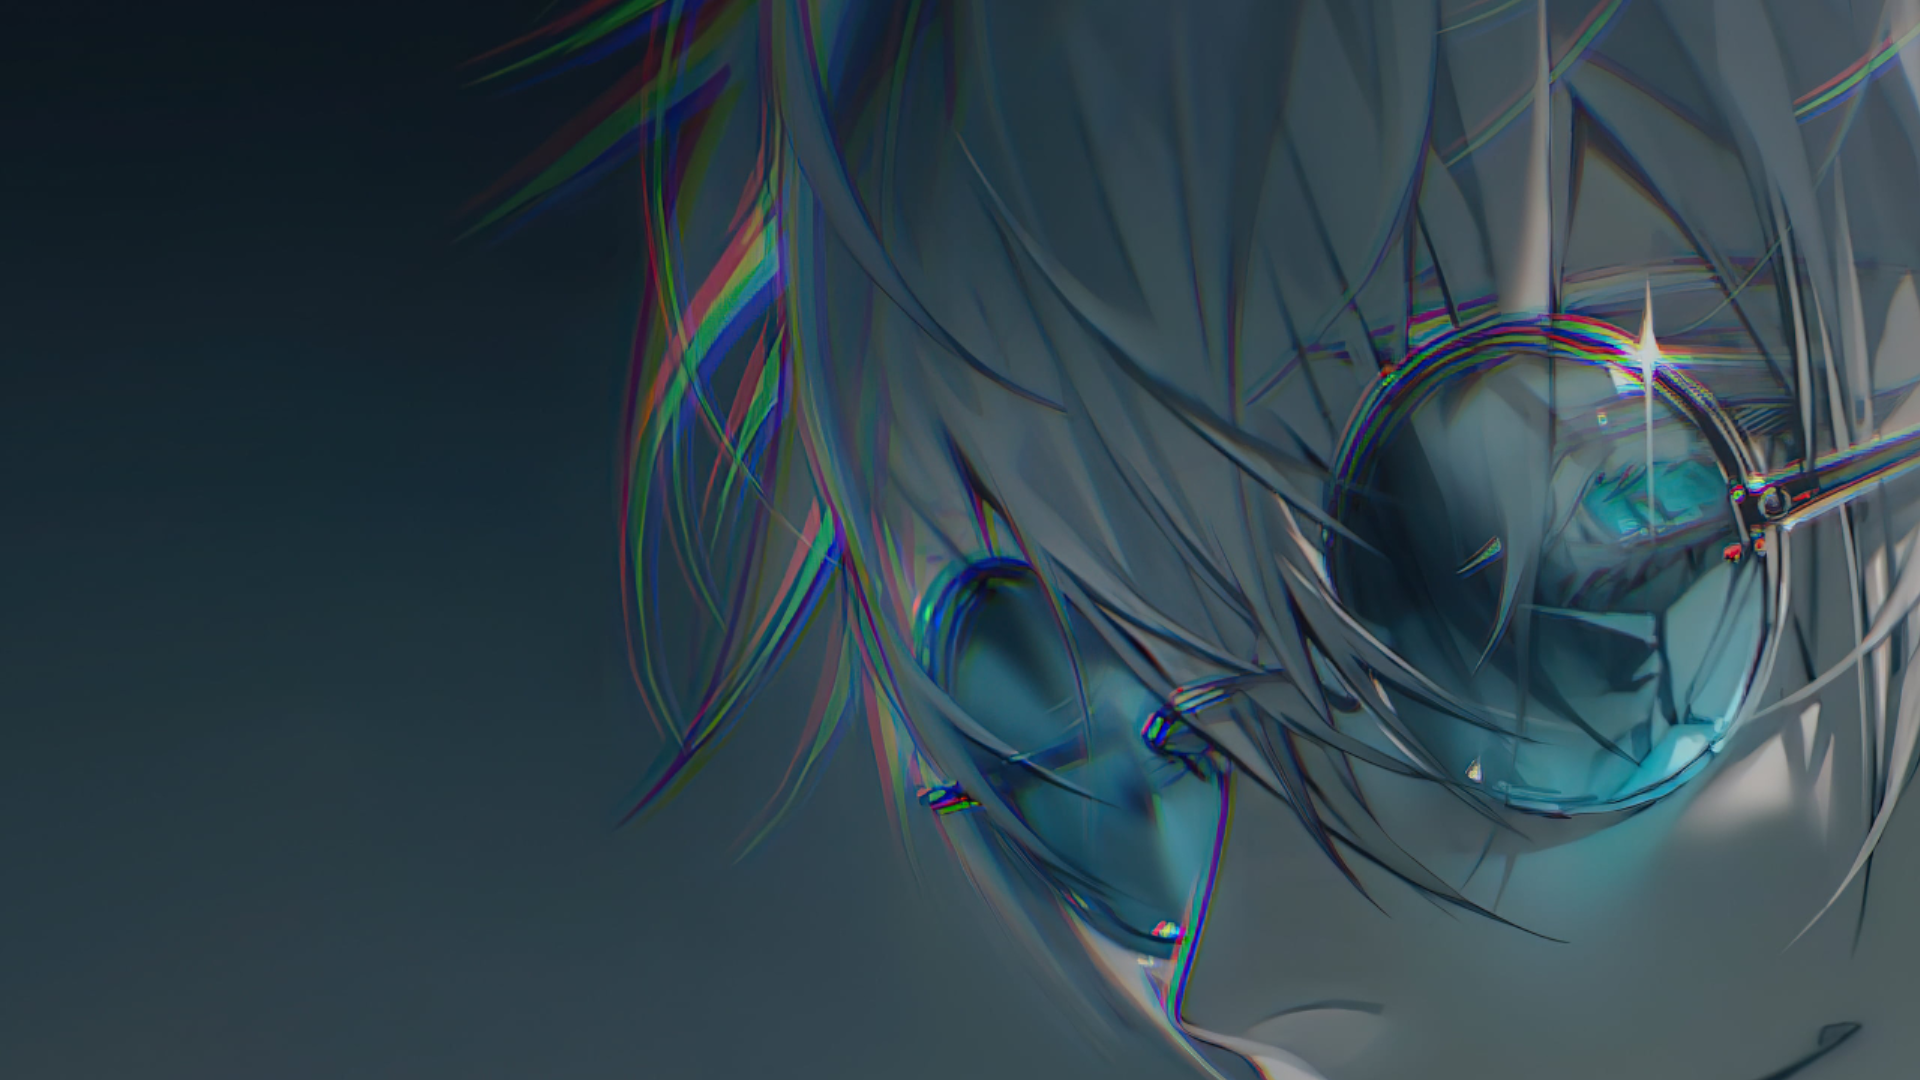

Rotated Image


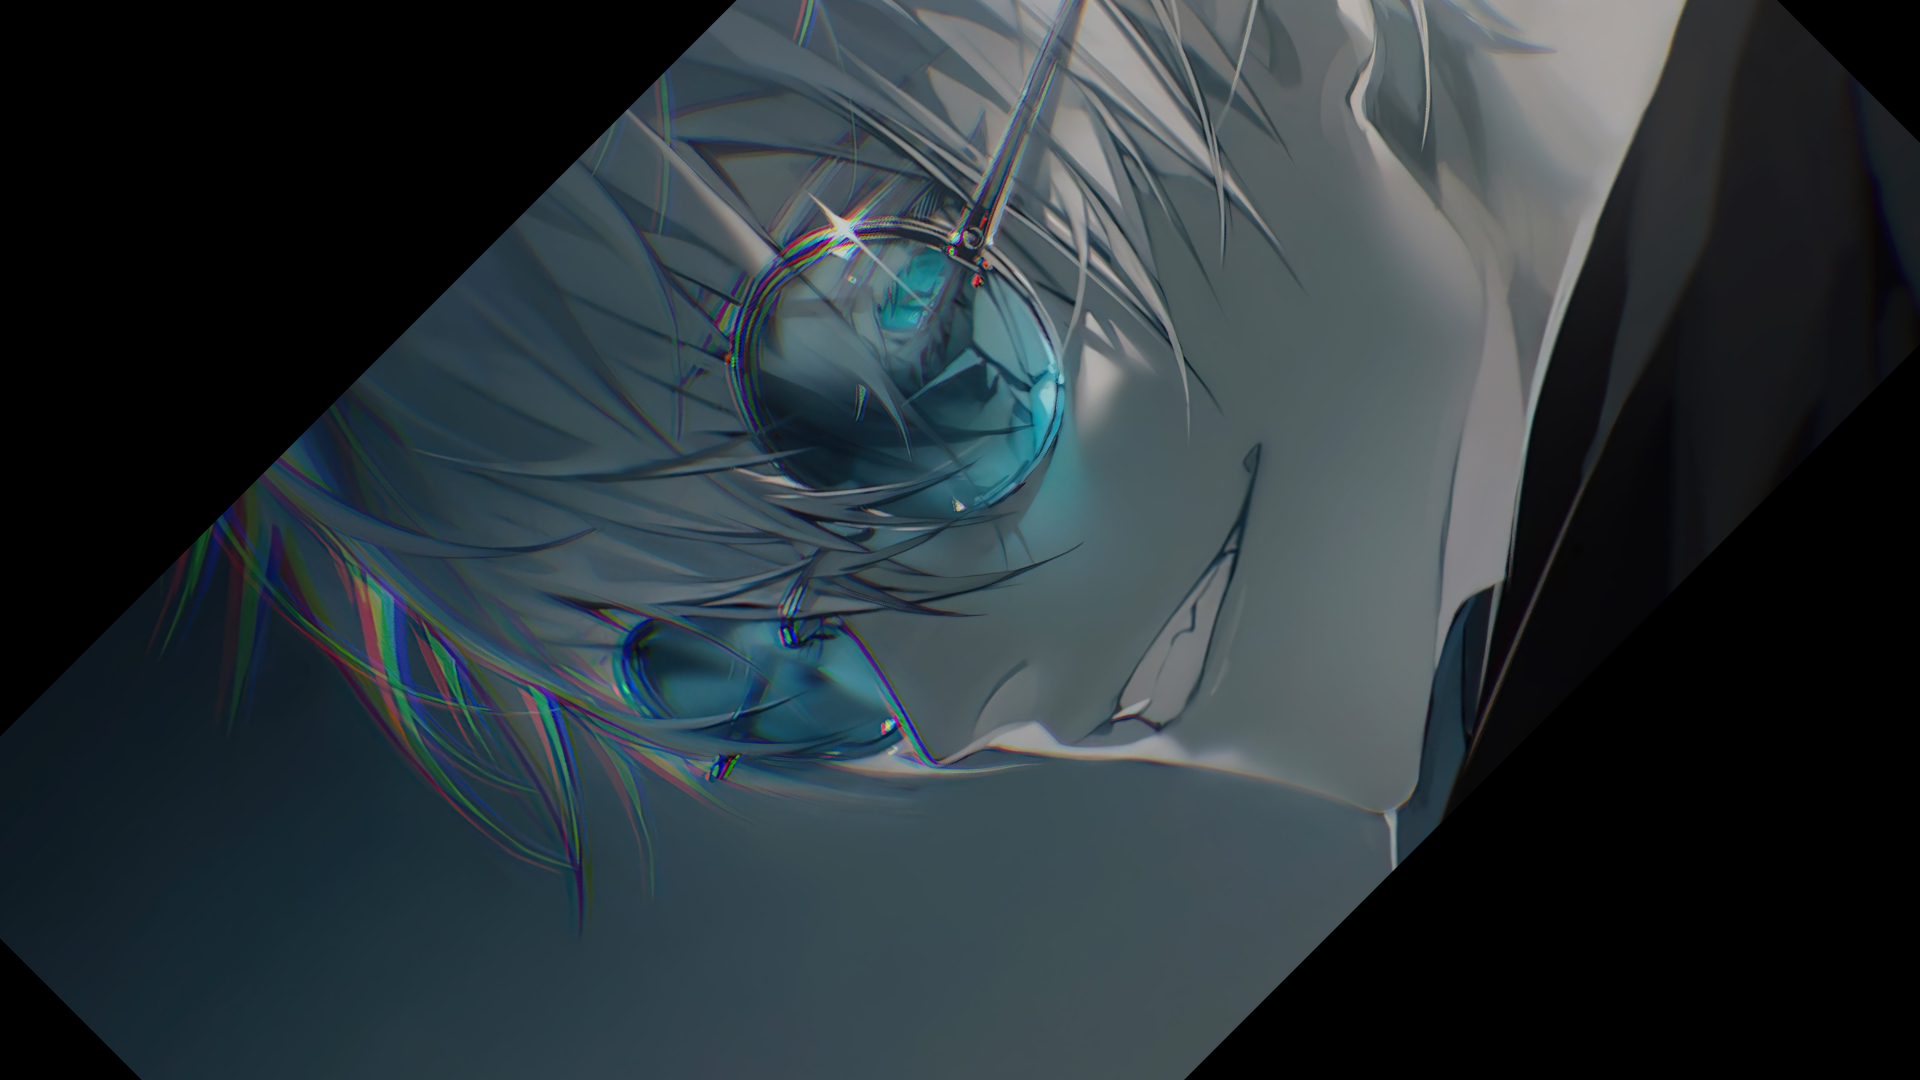

Translated Image


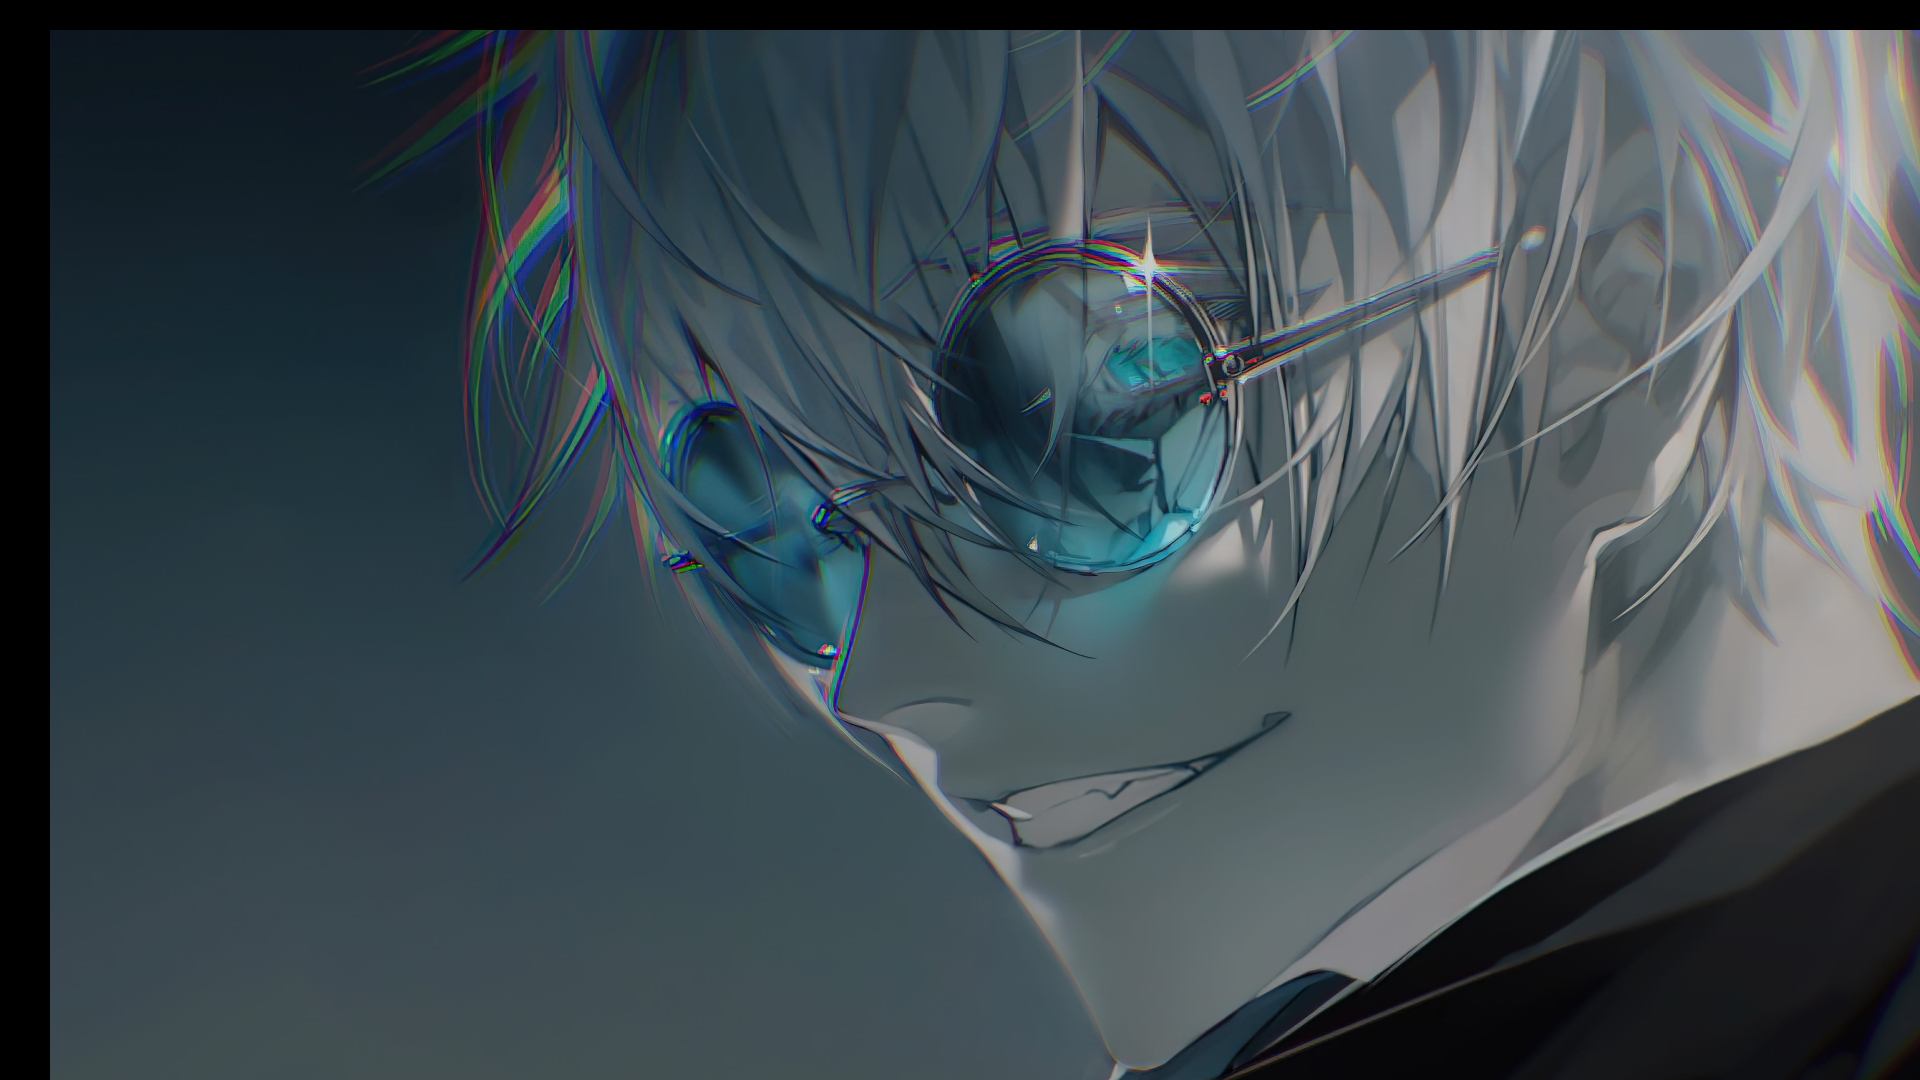

In [69]:
from google.colab.patches import cv2_imshow
print("Original Image")
cv2_imshow(img)
print("Scaled Image")
cv2_imshow(scaled_image)
print("Rotated Image")
cv2_imshow(rotated_image)
print("Translated Image")
cv2_imshow(translated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Face Detection From Image Arrays**




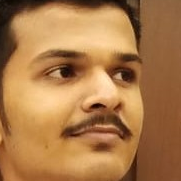

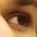

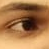

Number of faces detected:  1
Number of Eyes detected: 2


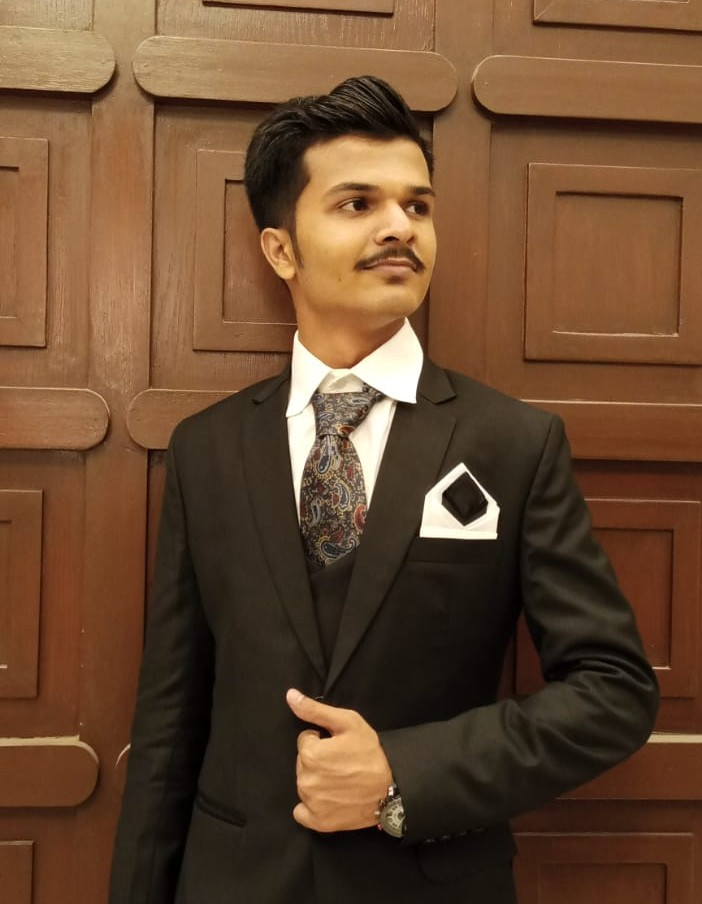

In [79]:
from google.colab.patches import cv2_imshow

face = cv2.imread('/content/picc.jpg')
image_grey = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(image_grey, scaleFactor = 1.1, minNeighbors = 5)

for (x, y, w, h) in faces:
  face_region = face[y:y+h, x:x+w]

  cv2_imshow(face_region)

  eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors = 5)

  for (ex, ey, ew, eh) in eyes:
    eye_region = face_region[ey:ey+eh, ex:ex+ew]
    cv2_imshow(eye_region)

print("Number of faces detected: ", len(faces))
print("Number of Eyes detected:", len(eyes))
cv2_imshow(face)
cv2.waitKey(0)
cv2.destroyAllWindows()
